# Homework 3 - Places of the world

## Libriaries

In [67]:
## libraries used for web scraping
from urllib.request import urlopen
from bs4 import BeautifulSoup 
import requests
import re
import urllib.request
import urllib.parse
import os
from time import perf_counter
from clear_cache import clear as clean_cache
from multiprocessing import Pool
import haversine as hv


import json

In [68]:
#nltk
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import words  
from nltk.corpus import wordnet as wn
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


In [69]:
## other libraries
import pandas as pd
import numpy as np
import re

from collections import Counter

In [70]:
## skitlearn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer 

In [71]:
# plots
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as px
import plotly.graph_objects as go

### 1. Data collection

#### 1.1. Get the list of places

We focus on the Most popular places from https://www.atlasobscura.com
<br>We want you to collect the URL associated with each site in the list from this list. The list is long and split into many pages. Therefore, we retrieve only the URLs of the places in the first 400 pages (each page has 18 places, so 7200 links).
The final  output is a .txt file where a single line corresponds to the place's URL.

In [ ]:
f = open("urls.txt", "w") ## We created a .txt file in writing mode

for i in range(1,401): 
    url = f'https://www.atlasobscura.com/places?page={i}&sort=likes_count' # We noticed that the urls of each page in most popular place is the same, except for page=i
    # So pages can be scrolled by changing the number after page=i (e.g. https://www.atlasobscura.com/places?page=10&sort=likes_count correspons to the tenth page in Most popular places)
    
    reqs = requests.get(url) ## We used library requests in order to get the url from a string
    
    soup = BeautifulSoup(reqs.text, 'html.parser') # We used BeautifulSoup to get html of each page
    
    for link in soup.find_all(class_=re.compile("content-card content-card-place")): # find_all in order to get each tag of the page which belongs to a specific class
        a=(link.get('href')) # With 'href' we got the url of each place inside the i-th page 
        
        f.write('https://www.atlasobscura.com/'+a) # Wrting the rows of .txt file with the complete url
        f.write('\n')# each row has only one url
f.close()

#### 1.2. Crawl places


In this step we executed the following passages:
1. Download the .html file corresponding to each url collected in the previous task.
2. For each page in Most popular place we created a folder containing the html of all places of a specific page.
   <BR>(e.g. within the 40th folder there will be all the places' html belonging to the 40th page in Most common place on AtlasObscura)
3. Using multiprocessing(a procees based on parallelism) we reduced the time to download the html files.

In [ ]:
def download_process(i):
        url = f'https://www.atlasobscura.com/places?page={i}&sort=likes_count'
        
        reqs = requests.get(url)
        soup = BeautifulSoup(reqs.text, 'html.parser')
        os.makedirs('PAGE '+str(i)) # Creating a folder, its name is Page and the number of the page
        os.chdir('PAGE '+str(i)) ## Go inside the directory just created
       
        for link in soup.find_all(class_=re.compile("content-card content-card-place")):
            a=(link.get('href'))
            url_='https://www.atlasobscura.com/'+a
            file= open(str(a)[8:]+'.html','w',encoding="UTF-8") # craeting an html file in each link inside a page 
            with urlopen( url_ ) as webpage:
                content = webpage.read().decode() # using urlopen to get html file of each place
            file.write(content) # Writing the file just created
            file.close() # closing 
        os.chdir('..') # going back to previous folder
        

        clean_cache() # clean cache 

    
def multiprocessing_fun(N):
    for i in range(1,N+1):
        p=Process(target=download_process(i))
        p.start()
        p.join()
        
if __name__ == "__main__":
    multiprocessing_fun(400)

##### Comparing results without and with multiprocessing

In [ ]:
## Without multiprocessing
times={}
for i in range(1,51):
        url = f'https://www.atlasobscura.com/places?page={i}&sort=likes_count'
        start_time = perf_counter()
        reqs = requests.get(url)
        soup = BeautifulSoup(reqs.text, 'html.parser')
        os.makedirs('PAG '+str(i))
        os.chdir('PAG '+str(i))
        count=i
        for link in soup.find_all(class_=re.compile("content-card content-card-place")):
            a=(link.get('href'))
            url_='https://www.atlasobscura.com/'+a
            file= open(str(a)[8:]+'.html','w',encoding="UTF-8")
            with urlopen( url_ ) as webpage:
                content = webpage.read().decode()
            file.write(content)
            file.close()
        end_time = perf_counter()
        final_time = end_time - start_time
        if count not in times:
            times[count]=final_time
        os.chdir('..')
        clean_cache()
        

In [ ]:
with open('times.txt','w') as d:
    d.write(json.dumps(times))  

In [ ]:
with open('times.txt') as d:
    dictionary = d.read()
times= json.loads(dictionary)    

In [ ]:
def download_process(i):
        url = f'https://www.atlasobscura.com/places?page={i}&sort=likes_count'
        
        reqs = requests.get(url)
        soup = BeautifulSoup(reqs.text, 'html.parser')
        os.makedirs('PAGE '+str(i)) # Creating a folder, its name is Page and the number of the page
        os.chdir('PAGE '+str(i)) ## Go inside the directory just created
       
        for link in soup.find_all(class_=re.compile("content-card content-card-place")):
            a=(link.get('href'))
            url_='https://www.atlasobscura.com/'+a
            file= open(str(a)[8:]+'.html','w',encoding="UTF-8") # craeting an html file in each link inside a page 
            with urlopen( url_ ) as webpage:
                content = webpage.read().decode() # using urlopen to get html file of each place
            file.write(content) # Writing the file just created
            file.close() # closing 
        os.chdir('..') # going back to previous folder
        

        clean_cache() # clean cache 

    

def multiprocessing_fun(N):
    times_multiprocessing={}
    for i in range(1,N+1):
        start_time=perf_counter()
        p=Process(target=download_process(i))
        p.start()
        count=i
        end_time = perf_counter()
        final_time = end_time - start_time
        if count not in times_multiprocessing:
            times_multiprocessing[count]=final_time
        
    with open('times_multi.txt','w') as d:
        d.write(json.dumps(times_multiprocessing))
        


p = Pool(10)
for i in range(2,3):
    start_time=perf_counter()
    p.map(download_process(i), range(1,2))
    p.terminate()
    p.join()
    end_time = perf_counter()
    final_time = end_time - start_time
    



([<matplotlib.axis.XTick at 0x1aa7b8b5c70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

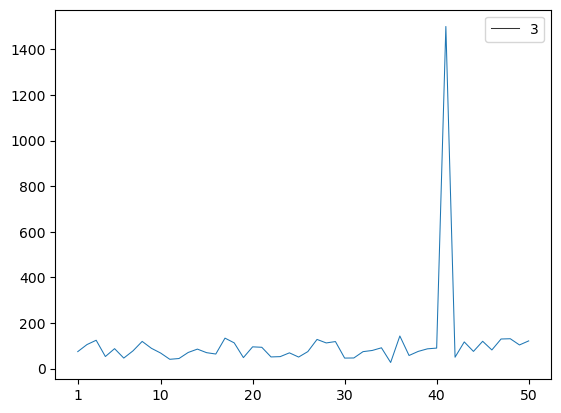

In [119]:
sbn.lineplot(times_,x=times_.keys(),y=times.values(),size=3)
plt.xticks([0,9, 19, 29,39,49])



#### 1.3 Parse downloaded pages

Now for each file into the corrisponding folder, we created a tsv file in the following format:

We copied the format of each .tsv file from https://github.com/lucamaiano/ADM/tree/master/2022/Homework_3

<br>Place Name (to save as placeName): String.
<br>Place Tags (to save as placeTags): List of Strings.
<br># of people who have been there (to save as numPeopleVisited): Integer.
<br># of people who want to visit the place(to save as numPeopleWant): Integer.
<br>Description (to save as placeDesc): String. Everything from under the first image up to "know before you go" (orange frame on the example image).
<br>Short Description (to save as placeShortDesc): String. Everything from the title and location up to the image (blue frame on the example image).
<br>Nearby Places (to save as placeNearby): Extract the names of all nearby places, but only keep unique values: List of Strings.
<br>Address of the place(to save as placeAddress): String.
<br>Latitud and Longitude of the place's location(to save as placeAlt and placeLong): Floats
<br>The username of the post editors (to save as placeEditors): List of Strings.
<br>Post publishing date (to save as placePubDate): datetime.
<br>The names of the lists that the place was included in (to save as placeRelatedLists): List of Strings.
<br>The names of the related places (to save as placeRelatedPlaces): List of Strings.
<br>The URL of the page of the place (to save as placeURL):String


In [ ]:
for i in range(1,401): # Parse all the folders previously created
    os.chdir('PAGE '+str(i)) #change directories
    for filename in os.listdir(os.getcwd()): # get all the files in a folder
        if filename.endswith(".html"): # if file extension is .html
            with open(os.path.join(os.getcwd(), filename), 'r',encoding='utf-8') as f: ## open each file into a folder
                soup = BeautifulSoup(f,'html.parser') # get the html file by each file 
                out=[] # initialize a list where we append all the informations parsed from each html file
                tag=[] 
                
                ## Using find_all(for classes of a tag) and select (selecting CSS selectors) we are able to get all the informations required from each place



                [out.append(i.text) for i in soup.find_all(class_=re.compile("DDPage__header-title"))] ## place name
                [tag.append(i.text[1:-1]) for i in soup.find_all(class_=re.compile("itemTags__link js-item-tags-link"))] #place tags
                out.append(tag)
                a=[int(i.text) for i in soup.find_all(class_=re.compile("title-md item-action-count"))] # Number people wanted and number people visited
                out.append(a[0])
                out.append(a[1])
                [out.append(i.text.replace('\n',' ')[2:-2]) for i in soup.find_all(class_=re.compile("DDP__body-copy"))] # description of a place
                [out.append(i.text[:-1]) for i in soup.find_all(class_=re.compile("DDPage__header-dek"))] # short description of a place
                b=[(i.text.replace('\n',' ')[1:-1]) for i in soup.find_all(class_=re.compile("DDPageSiderailRecirc__item-text"))] # nearby place
                out.append(b)
                [out.append(i.text.replace('\n','')) for i in soup.select('#place-container > div.DDPage__content-row.grid-row > div.DDPageSiderail__column.grid-col-lg-4.grid-col-md-5 > div.DDPageSiderail > aside.DDPageSiderail__details > address > div')]
                ## line above address
                c=[(i.text.replace('\n','').split(',')) for i in soup.select('#place-container > div.DDPage__content-row.grid-row > div.DDPageSiderail__column.grid-col-lg-4.grid-col-md-5 > div.DDPageSiderail > aside.DDPageSiderail__details > div')]
                out.append(float(c[0][0])) ## latitude
                out.append(float(c[0][1])) ## longitude
                cont=[]
                [cont.append(i.text) for i in soup.select('#ugc-module > div > div:nth-child(2) > div.DDPContributorsList > a')] # editors
                [cont.append(i.string) for i in soup.select('li>a>span') if i.string!=None] # editors
                out.append(cont) 
                for i in soup.find_all(class_=re.compile('DDPContributor__name')): ## post publishing date
                    time=(i.text.replace(',',''))
                if isinstance(a,str)==True:
                    time=(datetime.strptime(time,'%B %d %Y').date())
                    out.append(time)
                else:
                    out.append(time)
                lists=[]
                [lists.append(i.text) for i in (soup.select('#page-content > article > div.vue-js-bte-place-parent.hidden-print.js-vue-component-wrap > div:nth-child(6) > div > div > div.card-grid.CardRecircSection__card-grid.js-inject-gtm-data-in-child-links>div>div>a>div>h3>span'))]
                ##line above place related list
                out.append(lists)
                rel=[]
                [rel.append(i.text) for i in (soup.select('#page-content > article > div.vue-js-bte-place-parent.hidden-print.js-vue-component-wrap > div:nth-child(4) > div > div > div.card-grid.CardRecircSection__card-grid.js-inject-gtm-data-in-child-links>div>div>a>div>h3>span'))]
                ##line above place related places
                out.append(rel)
                
                out.append(soup.find('link',{'rel':'canonical'})['href']) ## place url

                f.close()
                ## Creating file .tsv
                l = ['placeName','placeTags','numPeopleVisited','numPeopleWant','placeDesc','placeShortDesc','placeNearby','placeAddress','placeAlt',
                    'placeLong','placeEditors','placePubDate','placeRelatedLists','placeRelatedPlaces','placeURL']
                with open(filename+'.tsv','w',encoding='utf-8') as tsv:
                    tsv_output = csv.writer(tsv, delimiter='\t')
                    tsv_output.writerow(l)
                    tsv_output.writerow(out)



            
    os.chdir('..')

We merge all of the .tsv files in all of the folders to one single .tsv file where this will be our final dataset

In [ ]:
data=[]
for i in range(1,401):
    os.chdir('PAGE '+str(i))
    for filename in os.listdir(os.getcwd()):
        if filename.endswith(".tsv"):
            a = pd.read_csv(filename,sep='\t')
            data.append(a)
    os.chdir('..')
data=pd.concat(data,ignore_index=True)     
data.to_csv('Dataset.tsv',sep='\t',index=False)

### 2. Search Engine

#### 2.0. Pre-processing

In [72]:
dataset=pd.read_csv('Dataset.tsv', sep='\t') # read the dataset

In [73]:
# Now, we have the following problem:
# in exercise 2.2, we were struggling with creating a certain variable, so we decided to create two columns.
# In the first one, put all the processed words INSIDE A LIST.

# So now we create a new column, filled by 'cleaned' descriptions (no punctuation, tokenization, lemmatization) inside LISTS.

stopwords = stopwords.words('english')  # list of stopwords
#print(stopwords)  # id you need to print the list of words you're going to delete
#stopwords = stopwords.append('a')  # to add a stopword to the list

lemmatizer = WordNetLemmatizer()
processed = []
dataset['Processed_list'] = None

for index, row in dataset.iterrows():
    small_processed = []
    sentence = row['placeDesc'].lower()
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stopwords]
    for word in words:
        small_processed.append(lemmatizer.lemmatize(word))    

    processed.append(small_processed)
    
dataset['Processed_list'] = processed 

In [74]:
# In the second column we do the same extact thing, but inseatd of putting the words inside lists, we put them inside strings
dataset['Processed_strings'] = None
dataset['Processed_strings'] = [' '.join(map(str, l)) for l in dataset['Processed_list']]

#### Q2.1: Conjuntive query

In [75]:
# Now we can do the real 2.1.1)

# What we need to do is to create a dictionary containing all the words of the description, where:
# { key = word : value = [docs containing the word] }

# So, first we crate a list containing all the processed words. Tod do it, we use the column Processed_list:

all_words = []

for index, row in dataset.iterrows():
    for w in row['Processed_list']:
        if w not in all_words:
            all_words.append(w)

##### Q2.1.1: Create the inverted index
Create a file named vocabulary, in the format you prefer, that maps each word to an integer (term_id).

In [76]:
# Create a dictionary in which we have -->  word:word_id  <--
# This is useful because we will have to use word_id instead of words in the next points

word_dict = {}
item_id = 1
for word in all_words:
    word_dict[word] = item_id
    item_id += 1 

**The Inverted Index**
<br>It will be a dictionary in this format:
>{
term_id_1:[document_1, document_2, document_4],
<br>term_id_2:[document_1, document_3, document_5, document_6],
...}
<br>where document_i is the id of a document that contains that specific word.

In [ ]:
# We create the dictionary that we are going to save on a separate file

# Once it runned, it is sufficient to load the file, as we will see in the next cells

cont_docs_prova = {}

for w, j in zip(word_dict.keys(), word_dict.values()):
    lista = []
    for words, idx in zip(dataset['Processed_list'], dataset.index):
        if w in words:
            lista.append(idx)
    if w not in cont_docs_prova:
        cont_docs_prova[j] = lista  
        
with open('dictionary_index.txt', 'w') as file_conv:
    file_conv.write(json.dumps(cont_docs_prova))

In [77]:
with open('dictionary_index.txt') as d:
    dictionary = d.read()
cont_docs = json.loads(dictionary)    

##### Q2.1.2: Execute the query
Given a query input by the user the Search Engine is supposed to return a list of documents.

In [79]:
query = input().lower().split()

l=[]       
for word in query:  # for every word inside the query
    if word in word_dict.keys(): # we check the index of the word, stored in word_dict
        l.append(cont_docs[str(word_dict[word])]) # we append the indexes of all the documents containing the word
    else:
        print('Sorry, no correspondence for word -->', word)    
x = set.intersection(*map(set,l))  # we want the documents that contain all the ords of the query, so we use the intersection

y = list(sorted(x))
searchMap = dataset.iloc[y]
search = dataset.iloc[y, [0, 4, -3]]
search
#dataset.iloc[y, [0, 4, -3]]  # select the columns
#dataset.iloc[x, [0, 4, -3]]  # select the columns
#search_for_map = x

 art renaissance 


,placeName,placeDesc,placeURL
74,Bibliothèque nationale de France (National Lib...,The massive Bibliothèque nationale de France i...,https://www.atlasobscura.com/places/bibliotheq...
159,The Monsters of Bomarzo,"The Park of the Monsters, or “Parco dei Mostri...",https://www.atlasobscura.com/places/the-monste...
245,The Mansion on O Street,"The Mansion on O Street, near Dupont Circle in...",https://www.atlasobscura.com/places/mansion-o-...
619,Long Now Orrery,Inside the offices of the Long Now Foundation ...,https://www.atlasobscura.com/places/long-now-o...
894,Sir John Soane's Museum,Sir John Soane was an architect and dedicated ...,https://www.atlasobscura.com/places/sir-john-s...
1061,Zuccari Palace,"In Rome there are thousands of churches, old b...",https://www.atlasobscura.com/places/zuccari-pa...
1288,Museum of Modern Renaissance,"Located on a residential street in Somerville,...",https://www.atlasobscura.com/places/museum-of-...
1624,Dumbarton Oaks,This stunning estate with sprawling formal gar...,https://www.atlasobscura.com/places/dumbarton-...
1813,Medici Hall of Maps (Sala delle Carte Geografi...,When Giorgio Vasari undertook the restoration ...,https://www.atlasobscura.com/places/sala-delle...
2262,Millennium Biltmore Hotel,The Millennium Biltmore Hotel has hosted Holly...,https://www.atlasobscura.com/places/millennium...


#### 2.2) Conjunctive query & Ranking score

For the second search engine, given a query, we want to get the top-k (the choice of k it's up to you!) documents related to the query. In particular:

  * Find all the documents that contain all the words in the query.
  * Sort them by their similarity with the query.
  * Return in output k documents, or all the documents with non-zero similarity with the query when the results are less than k. 
    <br> You must use a heap data structure (you can use Python libraries) for maintaining the top-k documents.

To solve this task, you must use the tfIdf score and the Cosine similarity. The field to consider is still the placeDesc. Let's see how.

##### Q2.2.1: Inverted Index

The second Inverted Index must be of this format:
>{
<br>term_id_1:[(document1, tfIdf_{term,document1}), (document2, tfIdf_{term,document2}), (document4, tfIdf_{term,document4}), ...],
<br>term_id_2:[(document1, tfIdf_{term,document1}), (document3, tfIdf_{term,document3}), (document5, tfIdf_{term,document5}), (document6, tfIdf_{term,document6}), ...],
<br>...}

TfIdf values are invariant for the query

In [81]:
# Create matrices for each document.
# Inside these matrices we have the tf-idf values

tfidf = TfidfVectorizer(input='content', lowercase = False)
result = tfidf.fit_transform(dataset['Processed_strings'])  # prima era place_Desc, non capisco perché ora ci metta così tanto tempo
#results_dense_list = result_dense.tolist()
array_tfidf = result.toarray()
print(array_tfidf)
print('*'*73)
print('*'*73)
print(array_tfidf.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.09535684 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
*************************************************************************
*************************************************************************
(7200, 50695)


In [84]:
# We convert it into a pandas dataframe
tfidf_df = pd.DataFrame(array_tfidf, index = dataset.index, columns = tfidf.get_feature_names_out())
tfidf_df
tfidf_transpose = tfidf_df.transpose()

In [ ]:
### Creating the inverted index
d={}
for key,val in zip(word_dict.keys(),word_dict.values()):
    l=[]
    for i,j in zip(dataset.Processed_list,dataset.index):
        if key in i and key in tfidf_df.columns:
            t=[]
            t.append(j)
            t.append(tfidf_df.loc[j,key])
            l.append(tuple(t))
    d[val]=l
with open('Inverted_Index.txt', 'w') as file_conv: ### Creating a file in order to store it
    file_conv.write(json.dumps(cont_docs_prova))
with open('Inverted_Index.txt') as d: ## read the file .txt
    dictionary = d.read()
inv_indx = json.loads(dictionary)    



##### 2.2.2) Execute the query
Given a query input by the user, the search engine is supposed to return a list of documents, ranked by their Cosine Similarity to the query entered in the input.

In [85]:
def query_CosSim_2(K):
    with open('dictionary_index.txt','r') as d:
        dictionary = d.read()
        cont_docs = json.loads(dictionary)
    
    query=str(input()).lower()
    
    a=[query]
    b=query.split()
    vectorizer = TfidfVectorizer()
    query_tfidf = vectorizer.fit_transform(a)
    
    l=[]
    for i in b:
        l.append(word_dict[(i)])
    doc_query=[]
    for i in l:
        doc_query.append(cont_docs[str(i)])
    doc_query1=[]
    for i in doc_query:
        for j in i:
            doc_query1.append(j)
    doc_query1=list(set(doc_query1))
    
    
    if doc_query1==[]:
        print('The query is not present in any document ')
    else:
        
    
        result = vectorizer.fit_transform(dataset['Processed_strings'].iloc[doc_query1])
        array_tfidf = result.toarray()

        tfidf_df = pd.DataFrame(array_tfidf, index = dataset['placeName'].iloc[doc_query1], columns = vectorizer.get_feature_names_out())

        cosineSimilarities = cosine_similarity(query_tfidf, tfidf_df[b])

        dfcs=pd.DataFrame(cosineSimilarities,index=a,columns=dataset['placeName'].iloc[doc_query1])
        similarity=list(np.array(dfcs)[0])
        x=dataset.iloc[doc_query1, [0, 4, -3]]
        
        x['similarity']=similarity
        x=x.sort_values(by='similarity',ascending=False).head(K)
        return x
    

In [86]:
query_CosSim_2(10)

 art renaissance 


,placeName,placeDesc,placeURL,similarity
4594,Eltham Palace,"Home to both kings and monkeys, this ancient p...",https://www.atlasobscura.com/places/eltham-palace,0.997642
7074,Bailey Art Museum,"Don’t go to Crockett, California’s Bailey Art ...",https://www.atlasobscura.com/places/bailey-art...,0.997642
4763,Medieval Art Exhibit at the Ringling Museum,"The Middle Ages tends to get a bad rap, consid...",https://www.atlasobscura.com/places/medieval-a...,0.997214
2721,Cave of Lascaux,Detailed anatomy and realistic perspective in ...,https://www.atlasobscura.com/places/cave-of-la...,0.983424
4414,Santa Monica Camera Obscura,"If the door is locked, knock on the wooden dut...",https://www.atlasobscura.com/places/camera-obs...,0.966600
6363,Lucas Theatre,Originally owned by the theater director Arthu...,https://www.atlasobscura.com/places/lucas-theatre,0.966600
7087,Swedenborgian Church,"With its exposed wooden beams, nature-themed d...",https://www.atlasobscura.com/places/swedenborg...,0.966600
2551,Peleș Castle,When King Carol I of Romania visited the small...,https://www.atlasobscura.com/places/peles-castle,0.966600
5833,Cimitero delle Porte Sante (Sacred Doors Cemet...,"Tucked behind the 1,000-year-old church of San...",https://www.atlasobscura.com/places/cimitero-d...,0.966600
2413,"Basilica of Saint Lawrence, Asheville",The turn of the 20th century was a time of pro...,https://www.atlasobscura.com/places/basilica-o...,0.966600


#### 3. Define a new score!

Taking advantage of the fact that a user can enter more than one input, we ask them for their location. This can indicate the current location or the one of a possible accommodation during a trip.
<br>In fact, we want to recommend destinations to the user that match their search but are also closer to their location. 
<br>To do this, we use the input address to obtain the latitude and longitude, and then calculate the distance with the places identified by the search engine we defined earlier.
<br>In addition, taking advantage of the columns numPeoplevisited and numberPeopleWant, we create a popularity index. We assigned different weights to the two variables (0.7 and 0.3), 
<bR>giving greater importance to numPeoplevisited , as we believe that actual visits are more indicative than planned visits.

<br>At this point, we decided to normalize the popularity index back to a value between 0 and 1. We did not do the same operation on distance. 
<br>In fact, by normalizing both variables we could have gotten more distant places just by having higher similarity or popularity. Our choice, however, was to reward closer places.

 $New Score = \left(\dfrac{CosineSimilarity}{Distance}\times Popularity \right)$

Now we apllies the normalization to **Popularity**
*    $Popularity_{Norm} = \left(\dfrac{Popularity-Popularity_{min} }{Popularity_{max}-Popularity_{min}} \right)$

<br>So the **NewScore** will be :
* $New Score = \left(\dfrac{CosineSimilarity}{Distance}\times Popularity_{Norm}\right)$



In [87]:
def query_NewScore(k):
    with open('dictionary_index.txt','r') as d:
            dictionary = d.read()
            cont_docs = json.loads(dictionary)

    query=str(input('Insert a query')).lower()

    address=str(input('Insert an address in the following format: street,house number, town'))

    a=[query]
    b=query.split()
    vectorizer = TfidfVectorizer()
    query_tfidf = vectorizer.fit_transform(a)

    l=[]
    for i in b:
            l.append(word_dict[(i)])
    doc_query=[]
    for i in l:
            doc_query.append(cont_docs[str(i)])
    doc_query1=[]
    for i in doc_query:
        for j in i:
            doc_query1.append(j)
    doc_query1=list(set(doc_query1))


    if doc_query1==[]:
        print('The query is not present in any document ')
    else:


            result = vectorizer.fit_transform(dataset['Processed_strings'].iloc[doc_query1])
            array_tfidf = result.toarray()

            tfidf_df = pd.DataFrame(array_tfidf, index = dataset['placeName'].iloc[doc_query1], columns = vectorizer.get_feature_names_out())

            cosineSimilarities = cosine_similarity(query_tfidf, tfidf_df[b])

            dfcs=pd.DataFrame(cosineSimilarities,index=a,columns=dataset['placeName'].iloc[doc_query1])
            similarity=list(np.array(dfcs)[0])
            x=dataset.iloc[doc_query1]
            x['similarity']=similarity
            
            
            url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
            response = requests.get(url).json()
            lat=(response[0]['lat'])
            lon=(response[0]['lon'])
            loc=(float(lat),float(lon))
            loc

            locs=x.iloc[:,[8,9]].values
            lista=[]
            for i in locs:
                lista.append(tuple(i))
            x['Loc']=lista
            dist=[]
            for i in x.Loc.values:
                dist.append(round(hv.haversine(loc,i),2))
            x['distance']=dist
            #x['distance']=abs(0.05-(x['distance'] - np.min(x['distance']))/(np.max(x['distance']-np.min(x['distance']))))
            pop=x.iloc[:,[2,3]].values
            x['popularity']=(0.7*x.iloc[:,2]+0.3*x.iloc[:,3])
            x['popularity']=abs(0.05-(x['popularity'] - np.min(x['popularity']))/(np.max(x['popularity']-np.min(x['popularity']))))
            x['score']=x.popularity*x.similarity/x.distance
            search_map=x
            return x
        
            #return(x.iloc[:,[0,4,7,-8,-1]].sort_values(by='score',ascending=False).head(k))

In [89]:
pd.options.mode.chained_assignment = None  # default='warn'
var=query_NewScore(10)
var.iloc[:,[0,4,7,-8,-1]].sort_values(by='score',ascending=False).head(10)

Insert a query art renaissance
Insert an address in the following format: street,house number, town Cattedrale di Santa Maria del Fiore


,placeName,placeDesc,placeAddress,placeURL,score
1813,Medici Hall of Maps (Sala delle Carte Geografi...,When Giorgio Vasari undertook the restoration ...,"Palazzo VecchioPiazza della Signoria Florence,...",https://www.atlasobscura.com/places/sala-delle...,0.148576
6834,Museo Opificio delle Pietre Dure,Pietre dure is the art of using the natural va...,76 Via degli AlfaniFlorenceItaly,https://www.atlasobscura.com/places/museo-opif...,0.070443
5267,Ospedale degli Innocenti (Hospital of the Inno...,Florence in the 1400s had a baby problem. Babi...,"Piazza SS. AnnunziataFlorence, 50121Italy",https://www.atlasobscura.com/places/ospedale-d...,0.065215
3825,Studiolo Francesco I de’ Medici,"A small room in Palazzo Vecchio in Florence, I...","Palazzo VecchioPiazza Della SignoriaFlorence, ...",https://www.atlasobscura.com/places/studiolo-f...,0.053185
5833,Cimitero delle Porte Sante (Sacred Doors Cemet...,"Tucked behind the 1,000-year-old church of San...","34 Via delle Porte SanteFlorence, 50125Italy",https://www.atlasobscura.com/places/cimitero-d...,0.015581
4867,La Specola Zoological Museum,"Beyond the tourist-swarmed Ponte Vecchio, a fl...",17 Via RomanaFlorenceItaly,https://www.atlasobscura.com/places/la-specola...,0.007680
808,The Colossus of Villa Demidoff,The beauty and mystery of renaissance gardens ...,"768D Via di San JacopoVaglia, 50036Italy",https://www.atlasobscura.com/places/villa-demi...,0.002597
6640,Towers of San Gimignano,"In the age of the Renaissance, Tuscany was the...","Piazza Duomo, 2San Gimignano, 53037Italy",https://www.atlasobscura.com/places/towers-san...,0.001928
3204,Babae Wine Window,"In Florence’s Santo Spirito neighborhood, you ...","Via Santo Spirito21RFlorence, 50125Italy",https://www.atlasobscura.com/places/babae-wine...,0.001730
159,The Monsters of Bomarzo,"The Park of the Monsters, or “Parco dei Mostri...","101 Via Madonna della ValleBomarzo, 01020Italy",https://www.atlasobscura.com/places/the-monste...,0.000914


#### 4. Visualizing the most relevant places

In [ ]:
# So we want to visualize the places we found in the search engine:
# NOTE: the column name is placeAlt, but obviously it refers to the Latitude

import plotly.express as px
import plotly.graph_objects as go

# NOTE 2: we are using thr dataset of places obtained by the query

#dataset.rename(columns = {'placeAlt':'Latitude', 'placeLong':'Longitude', 'placeAddress':'Address'}, inplace = True) # we rename some column names, just for a cooler representation

fig = px.scatter_mapbox(searchMap, lat="placeAlt", lon="placeLong", hover_name="placeName", hover_data=["numPeopleVisited", "placeAddress"], 
                        labels = {'numPeopleWant':'Number of people who want to visits', 'numPeopleVisited':'Number of visits', "placeAlt":'Latitude', "placeLong":'Longitude', 'placeAddress':'Address'},
                        color="numPeopleVisited", color_continuous_scale = 'tealrose' , size="numPeopleWant", zoom=2, height=300)
fig.update_layout(mapbox_style="open-street-map")

#fig.add_trace(mode = "markers+lines")

fig.show()

###  Theoretical question

##### BUBBLE-SORT

The Bubble Sort algorithm is one of the simplest sorting algorithm. It basically works by swapping one element with his adiacent one if they are not in a correct  order.
<br>This sorting algorithm is not really good for large data beacuse its time-complexitity is pretty high.
<br>It means that if you have 1000 items, this does 100^2 = 1,000,000 units of work.


##### How this algorithm work

Let's assume this input : array=[4,6,8,4,6,7]

First Step
<br>(4,6,8,4,6,7) -----> (6,4,8,4,6,7) swap 4 and 6 since 6>4
<br>(6,4,8,4,6,7) -----> (6,8,4,4,6,7) swap 8 and 4 since 8>4
<br>(6,8,4,4,6,7) -----> (6,8,4,4,6,7) no swap 4 = 4
<br>(6,8,4,4,6,7) -----> (6,8,4,6,4,7) swap 6 and 4 since 6>4
<br>(6,8,4,6,4,7) -----> (6,8,4,6,7,4) swap 7 and 4 since 7>4

Second step
<br>(6,8,4,6,7,4) -----> (8,6,4,6,7,4) swap 8 and 6 since 8>6
<br>(8,6,4,6,7,4) -----> (8,6,4,6,7,4) no swap since 4<6
<br>(8,6,4,6,7,4) -----> (8,6,6,4,7,4) swap 6 and 4 since 6>4
<br>(8,6,6,4,7,4) -----> (8,6,6,7,4,4) swap 7 and 4 since 7 > 4
<br>(8,6,6,7,4,4) -----> (8,6,6,7,4,4) no swap since 4=4

Third step
<br>(8,6,6,7,4,4) -----> (8,6,6,7,4,4) no swap since 6<8
<br>(8,6,6,7,4,4) -----> (8,6,6,7,4,4) no swap since 6=6
<br>(8,6,6,7,4,4) -----> (8,6,7,6,4,4) swap 7 and 6 since 7>6
<br>(8,6,7,6,4,4) -----> (8,6,7,6,4,4) no swap since 4<6
<br>(8,6,7,6,4,4) -----> (8,6,7,6,4,4) no swap since 4=4

Fourth step
<br>(8,6,7,6,4,4) -----> (8,6,7,6,4,4) no swap since 6<8
<br>(8,6,7,6,4,4) -----> (8,7,6,6,4,4) swap 7 and 6 since 7>6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6=6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4<6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4 = 4

Although the array is already sorted, the algorithm needs a swap-free pass in order to be completed

Fifth Step
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6<8
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6<7
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 6=6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4<6
<br>(8,7,6,6,4,4) -----> (8,7,6,6,4,4) no swap since 4=4

#### Now it's time to apply this algorithm to ApplicantsInfo.txt

In [3]:
#### Open ApplicantsInfo.txt
data=[]
with  open('ApplicantsInfo.txt','r') as f:
    #### read each lines and stored it into data 
    data=f.readlines()
    
def Bubble_Sort(N):
    start=perf_counter()## perf_counter() in order to compute the time that algorithm needs to execute the query stored into ApplicantsInfo.txt
    ######################
    
    # First of all I created a list where for each row in data, it is appended a nested list where in elemnent 0 it is stored the applicant's name and in element 1 position -->
    # --> it is stored the applicant's average
    out=[]
    for i in range(1,N+1):
        row=[]
        line=data[i].split(' ')
        name=str(line[0])+' ' +str(line[1])
        marks=0
        row.append(name)
        for j in range(2,1002):
            marks+=int(line[j])
            ### compute the average  dividing by 1000, the number of exams that each student has taken
            average=marks/1000
        ### setting the precision to 2 decimal points 
        row.append(round(average,2))
        out.append(row)
    n=len(out)
    
    ######################
    
    # here starts the actual algorithm
     
    for i in range(n):
        for j in range(0,n-i-1):

            if out[j][1]<out[j+1][1]:
                out[j],out[j+1]=out[j+1],out[j]
            elif out[j][1]==out[j+1][1]:
                if out[j][0]>out[j+1][0]:
                    out[j],out[j+1]=out[j+1],out[j]
    ### It swaps two nested list also if it finds two name not in ascending order 
    
    
    
    ### now I created a txt file where there all the names of the applicants and the average sorted by descending order 
    with open('RankingList_BubbleSort.txt','w') as f:
        for i in out:
            a=i[0]+' '+str(i[1])
            f.write(a)
            f.write('\n')
    
    end=perf_counter()
    final_time = end-start
    time=round(final_time,2)
    
    return time

#### Time complexity 

#### Time complexity 

Assuming that **n** is the length of the array to sort and keeping in mind that Bubble Sort compares two adjacent element of the array:

| Iterations     | number of comparisons |
|----------------|-----------------------|
| 1              | n-1                   |
| 2              | n-2                   |
| 3              | n-3                   |
| ...            | ...                   |
| last iteration | 1                     |

<br>The total number of comparisons are:
<br> T(n)=(n-1)+(n-2)+(n-3)+...+1 = (n-1)n/2 ----> n^2
<br> The time complexity of this algorithm is O(n^2)



###### Evaluate the time taken for Bubble Sort to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [5]:
#### I stored the time that this algorithm need in order to sort five array with five different length
x=[1000,5000,10000,20000,50000]
y=[Bubble_Sort(1000),Bubble_Sort(5000),Bubble_Sort(10000),Bubble_Sort(20000),Bubble_Sort(50000)]

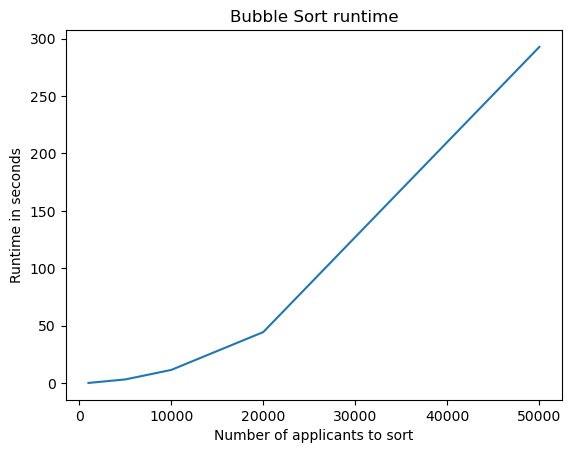

In [ ]:
### Plot runtime of Bubble Sort
plt.plot(x,y)
plt.xlabel('Number of applicants to sort')
plt.ylabel('Runtime in seconds')
plt.title('Bubble Sort runtime')
plt.show()

In [8]:
Bubble_Sort(50000) #### Time needed to execute the query stored into ApplicantsInfo.txt in seconds

290.92

##### SELECTION SORT

The Selection Sort algorithm is another simple sorting algorithm. It basically divided a list in two sub-lists, one(left) is sorted, the other one (right) not.
<br>Initially the left-list is empty and the right-list contains all the elements.
<br>Basically in each iteration the minimum / maximum element from the unsorted list is taken and moved to the sorted array.

Even this algorithm like bubble sort is not very suitable for large data beacause its time complexity is pretty high O(n^2).
It means that if you have 1000 items, this does 100^2 = 1,000,000 units of work.

##### How this algorithm work

Let's assume this input : array=[4,6,8,4,6,7]

First step
<br>(4,6,8,4,6,7)----->(8,6,4,4,6,7)
<br>The array is traversed from index 0 to 5. The first poistion where it is stored 4, after traversing the whole array 8 is the highest values.
<br>So the algorithm swaps 8 and 4, so the first element in the sorted array is 8

Second step
<br>(8,6,4,4,6,7)----->(8,7,4,4,6,6)
<br>The array is traversed from index 1 to 5. The second poistion where it is stored 6, after traversing the right array 7 is the highest values.
<br>So the algorithm swaps 7 and 6, so the second element in the sorted array is 7

Third step
<br>(8,7,4,4,6,6)----->(8,7,6,4,4,6)
<br>Now the array is traversed from index 2 to 5. The third poistion where it is stored 4, after traversing the right array 6 is the highest values.
<br>So the algorithm swaps 6 and 4, so the third element in the sorted array is 6

Fourth step
<br>(8,7,6,4,4,6)----->(8,7,6,6,4,4)
<br>At last the smallest value present in the array automatically get placed at the last position in the sorted array

#### Now it's time to apply this algorithm to ApplicantsInfo.txt

In [4]:
#### Open ApplicantsInfo.txt
data=[]
with  open('ApplicantsInfo.txt','r') as f:
    data=f.readlines()

def Selection_Sort(N):
    
    start=perf_counter() ## perf_counter() in order to compute the time that algorithm needs to execute the query stored into ApplicantsInfo.txt
    
    ######################
    
    # First of all I created a list where for each row in data, it is appended a nested list where in elemnent 0 it is stored the applicant's name and in element 1 position -->
    # --> it is stored the applicant's average

    out=[]
    for i in range(1,N+1):
        row=[]
        line=data[i].split(' ')
        name=str(line[0])+' ' +str(line[1])
        marks=0
        row.append(name)
        for j in range(2,1002):
            marks+=int(line[j])
            ### compute the average  dividing by 1000, the number of exams that each student has taken
            average=marks/1000
        ### setting the precision to 2 decimal points
        row.append(round(average,2))
        out.append(row)

    ######################
    
    # here starts the actual algorithm
    n=len(out)
    
    for i in range(n):
        min_=i # store the index of the array in order to swap with the maximum element of the unsorted array
        for j in range(i+1,n):
            if out[min_][1]<out[j][1]  :
                         min_=j
            elif out[min_][1]==out[j][1]:
                if out[min_][0]>out[j][0]:  ### It swaps two nested list also if it finds two name not in ascending order 
                    min_=j


        out[min_],out[i]=out[i],out[min_]
    
    
    
    ### now I created a txt file where there all the names of the applicants and the average sorted by descending order 
    with open('RankingList_SelectionSort.txt','w') as f:
        for i in out:
            a=i[0]+' '+str(i[1])
            f.write(a)
            f.write('\n')
    
    end=perf_counter()
    final_time=end-start
    time=round(final_time,2)
    
    return time


#### Time complexity 

Assuming that  **n** is the length of the array to sort, so:

| Iterations     | number of comparisons |
|----------------|-----------------------|
| 1              | n-1                   |
| 2              | n-2                   |
| 3              | n-3                   |
| ...            | ...                   |
| last iteration | 1                     |

The total number of comparisons are:
<br> T(n)=(n-1)+(n-2)+(n-3)+...+1 = (n-1)n/2 ----> n^2
<br> The time complexity of this algorithm is O(n^2)

##### Evaluate the time taken for Selection Sort to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [11]:
#### I stored the time that this algorithm need in order to sort five array with five different length
x=[1000,5000,10000,20000,50000]
y=[Selection_Sort(1000),Selection_Sort(5000),Selection_Sort(10000),Selection_Sort(20000),Selection_Sort(50000)]

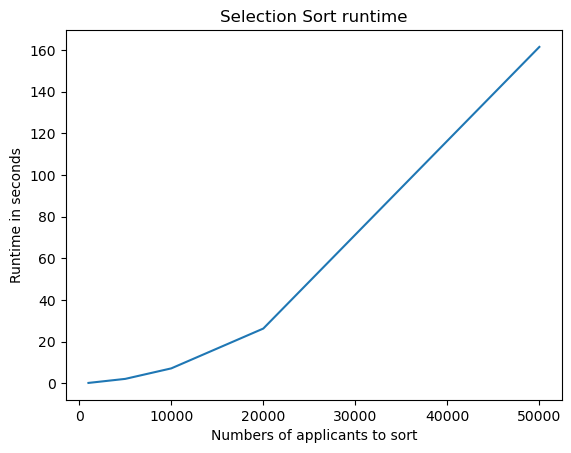

In [12]:
### Plot runtime of Selection Sort
plt.plot(x,y)
plt.xlabel('Numbers of applicants to sort')
plt.ylabel('Runtime in seconds')
plt.title('Selection Sort runtime')
plt.show()

In [13]:
Selection_Sort(50000)  #### Time needed to sort a list of 50,000 elements in seconds

156.96

##### QUICK-SORT

The QuickSort algorithm is a sorting algorithm based on the divide and conquer approach.It stored an element of an array as pivot and it builds partions around this pivot element.
<br>The type of the QuickSort depends on the method how the pivot element is picked from the array(in this case we always pick the last element as the pivot).
<br>The key process in quickSort is a partition(). The aim of partitions is, given an array and an element y as the pivot element, put y at its correct position in a sorted array and put all smaller elements <br>before y, and put all greater elements after y. All this step should be done in linear time.
<br>The average time complexity of this algorithm is O(Nlog(N)), it should be faster than the previous two


##### How this algorithm work

Let's assume this input : array=[4,6,8,4,6,7]

1. Pick pivot element 
(4,6,8,4,6,7)-----> pivot = 7

2. Rearrange the arrays in this way:
   2.1 The pivot element is compared with the elements beginning from the first index.
      <br>(4,6,8,4,6,7)-----> pivot(7) is compared with 4 
  
   2.2 If the element is smaller than the pivot element, a second pointer is set for that element.
      <br>    (4,6,8,4,6,7)-----> 4<7 so 4 is the second pointer
  
   2.3 Now, pivot is compared with other elements. If an element greater than the pivot element is reached, the greater element is swapped with the smaller element found earlier.
      <br>(4,6,8,4,6,7)-----> (8,6,4,4,6,7) 8>7(pivot) swap 8 and 4
  
   2.4 Again, the process is repeated to set the next smaller element as the second pointer. And, swap it with another greater element.
      <br>(8,6,4,4,6,7)-----> 6 is stored
   
   2.5 The process goes on until the second last element is reached.
      <br>(8,6,4,4,6,7)-----> it goes until 6(index=4)
   
   2.6 Finally, the pivot element is swapped with the second pointer.
      <br>(8,6,4,4,6,7)----->(8,7,4,4,6,6)
      
3. Divide Sub-arrays, choose the new pivot elements for the left-part of the array and for the right-part and the second step(2.) is repeated

This algorithm continues to divide in subarray until each array is formed by a single element, in this way the array is sorted

  

#### Now it's time to apply this algorithm to ApplicantsInfo.txt

In [1]:
#### Open ApplicantsInfo.txt
with  open('ApplicantsInfo.txt','r') as f:
    data=f.readlines()

def Partition(out, min_, max_): ### first of all I defined a function in order to build partitions of the array
  
    # Choose the rightmost element as pivot, in this case the pivot element it is also the name of the student
    pivot = out[max_][1]
    pivot_name=out[max_][0]
  
    # Pointer for greater element
    i = min_ - 1
  
    # Traverse through all elements and compare each element with pivot
    for j in range(min_, max_):
        if out[j][1] > pivot:
            # If element greater than pivot is found
            # swap it with the smaller element  i
            i = i + 1
  
            # Swapping element at i with element at j
            (out[i], out[j]) = (out[j], out[i])
        elif out[j][1]==pivot: ## if two applocants have the same average
            
            if out[j][0]<pivot_name:
                # If element smaller than pivot is found
                # swap it with the greater element  i
                i=i+1
               
                (out[i], out[j]) = (out[j], out[i])
                
            
  
    # Swap the pivot element with the smaller element specified by i
    (out[i + 1][1], out[max_][1]) = (out[max_][1], out[i + 1][1])
    (out[i + 1][0], out[max_][0]) = (out[max_][0], out[i + 1][0])
   
    
  
    # Return the position of the partion
    return i + 1
  
# Function to initialize the list where for each row in data, it is appended a nested list where in elemnent 0 it is stored the applicant's name and in element 1 position -->
    # --> it is stored the applicant's average
def init(N):
    out=[]
    for i in range(1,N+1):
            row=[]
            line=data[i].split(' ')
            name=str(line[0])+' ' +str(line[1])
            marks=0
            row.append(name)
            for j in range(2,1002):
                marks+=int(line[j])
                ### compute the average  dividing by 1000, the number of exams that each student has taken
                average=marks/1000
            ### setting the precision to 2 decimal points
            row.append(round(average,2))
            out.append(row)
    return out

# Function to compute quicksort with recursive  
def Quick_Sort(out, min_, max_):
    
    start=perf_counter() ## perf_counter() in order to compute the time that algorithm needs to sort the list
    if min_ < max_:
        
        # Find pivot element such that
        # element greater than pivot are on the left 
        # element smaller than pivot are on the right 
        p = Partition(out, min_, max_)
       
  
        # Recursive call on the left side of pivot
        Quick_Sort(out, min_, p - 1)
  
        # Recursive call on the right side of pivot
        Quick_Sort(out, p + 1, max_)
    end=perf_counter()
    final_time=end-start
    time=round(final_time,2)
    
    return out ### change with (return out) to create the get the list ordered as the output 

# function to create a txt file where there all the names of the applicants and the average sorted by descending order 
def Quick_Sort_Executequery(N):
    start=perf_counter() ## start a counter in order to calcute how does it takes to execute the query 
    
    a=Quick_Sort(init(N),0,len(init(N))-1)
    with open('RankingList_QuickSort.txt','w') as f:
        for i in a:
            a=i[0]+' '+str(i[1])
            f.write(a)
            f.write('\n')
    
    end=perf_counter() ## end the counter
    final_time=end-start
    time=round(final_time,2)
    return time

#### Time complexity 

The time complexity of this algorithm depends on the pivot's position into the array:
* *Worst case*
  <br> This situation occurs when the partition function selects the smallest or the largest element of the array as the pivot every time. 
  <br> In this case the time complexity of quicksort is O(n^2)
  <br> Lets T(n) ne total time complexity for worst case
  <br> n is the total number of elements to sort and K is a constant

  >     T(n) = T(n-1) + K*n
        as we are dividing array into two parts one consist of single element and other of n-1 and we will traverse individual array
        T(n) = T(n-2) + K*(n-1) + K*n =  T(n-2) + 2*K*n - K
        T(n) = T(n-3) + 3*K*n - 2*K - K
        T(n) = T(n-3) + 4*K*n - 3*K - 2*K -K
        ....................................................................
        for j<n 
        T(n) = T(n-j) + j*K*n - (j-1)*K - ..... - 2*constant - constant
        T(n) = T(n-j) + j*K*n - k*[(j-1) ....  + 3 + 2 + 1]
        T(n) = T(n-j) + j*n*K - K*[j*(j-1)/2]
        put n=j
        T(n) = T(0) + K*n*n - K*[n*(n-1)/2]
        deleting K
        T(n) = n*n - n*(n-1)/2
        T(n) = O(n^2)
        
* *Best case*
  <br> This situation occurs when the pivot elemnt is selected from the middle of the partion:
  <br> In this case the time complexity of quick sort is O(nlog(n))
  <br> Lets T(n) the total time complexity for best case
  <br> n is the total number of elements to sort and K is a constant
  >    T(n) = 2*T(n/2) + K*n
        2*T(n/2) is because we are dividing array into two array of the same size
        <br>K*n is because we will be traversing elements of array 
        
  >      T(n) = 2*T(n/2) + K*n
        Dividing the array in two of the same size (like a binary tree)
        T(n) = 2*(2*T(n/4) + K*n/2) + K*n = 4*T(n/4) + 2*K*n
        T(n) = 2*(4*T(n/8)+ K*n/4)  + K*n = 8*T(n/8) + 4*K*n
        T(n) = 2*(8*T(n/16)+ K*n/8)  + K*n = 16*T(n/16) + 8*K*n
        ....................................................... 
        for j<n
        T(n) = 2^j * T(n/(2^j)) + j*K*n
        n = 2^j
        j = log2(n)
        Removing the costant 
        T(n) = n * T(1) + n*logn = O(n*log2(n))
  
* *Average case*
  <br> This situation occurs when the previous situations don't occur.
  <br> Considering a random element as pivot, Lets T(n) the total time complexity for average case  and i the pivot picked randomly.
  <br>then time complexity will be O(n*log(n))
   
  
                


##### Evaluate the time taken for Selection Sort to answer the query stored in the ApplicantsInfo.txt file and visualize them.

In [13]:
#### I stored the time that this algorithm need in order to sort five array with five different length
x=[1000,5000,10000,20000,50000]
y=[Quick_Sort_Executequery(1000),
  Quick_Sort_Executequery(5000),
  Quick_Sort_Executequery(10000),
  Quick_Sort_Executequery(20000),
  Quick_Sort_Executequery(50000)]
    


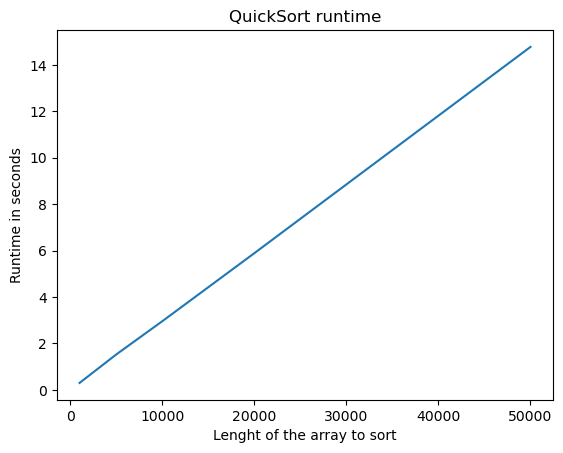

In [14]:
## Plot runtime of Quick Sort
plt.plot(x,y)
plt.xlabel('Lenght of the array to sort')
plt.ylabel('Runtime in seconds')
plt.title('QuickSort runtime')

plt.show()

In [22]:
Quick_Sort_Executequery(50000) ##### Time needed to sort a list of 50,000 elements in seconds

14.71

In [6]:
x=[1000,5000,10000,20000,50000]

In [10]:
y_BubbleSort=[Bubble_Sort(1000),Bubble_Sort(5000),Bubble_Sort(10000),Bubble_Sort(20000),Bubble_Sort(50000)]

y_SelectionSort=[Selection_Sort(1000),Selection_Sort(5000),Selection_Sort(10000),Selection_Sort(20000),Selection_Sort(50000)]

In [9]:
y_QuickSort=[Quick_Sort_Executequery(1000),
  Quick_Sort_Executequery(5000),
  Quick_Sort_Executequery(10000),
  Quick_Sort_Executequery(20000),
  Quick_Sort_Executequery(50000)]

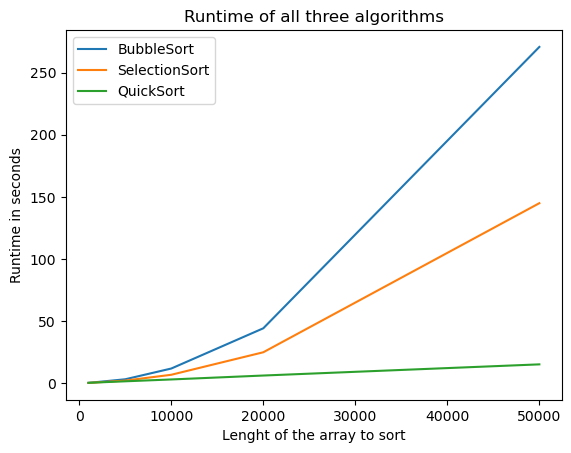

In [15]:
plt.plot(x,y_BubbleSort,label='BubbleSort')
plt.plot(x,y_SelectionSort,label='SelectionSort')
plt.plot(x,y_QuickSort,label='QuickSort')
plt.xlabel('Lenght of the array to sort')
plt.ylabel('Runtime in seconds')
plt.title('Runtime of all three algorithms')
plt.legend()
plt.show()